In [1]:
import numpy as np
from matplotlib import pyplot,cm as plt,cm
from scipy.interpolate import *
from ReferenceElement import *
import os
import imageio
from DG_functions_wave_inhomogeneous import *

In [2]:
N = 8
K = 8
CF = 2.**(-7)
start = 0.
end = 1.
a1 = 1.
a2 = -1.
alpha = 0.
h = (end-start)/K


reference_element = ReferenceElement(N)
reference_interval = reference_element[0]
M_inv = reference_element[1]*2/h
M_inv_S = reference_element[2]*2/h


In [3]:
def source_A(t):
    #return 5+0*t
    return np.sin(5*np.pi*t)
def source_B(t):
    return np.sin(5*np.pi*t)
def source_B_dot(t):
    return 5*np.pi*np.cos(5*np.pi*t)
def source_for_v(t):
    return source_A(t) + source_B_dot(t)

In [4]:
x = get_x_elements(start,end, K, reference_interval)
dx_min = get_dx_min(x)

In [5]:
u = np.zeros_like(x)
v = np.zeros_like(x)

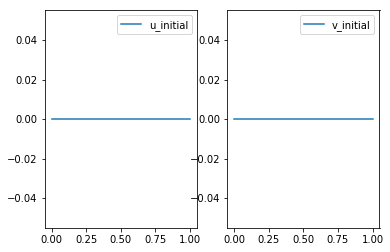

In [6]:
plt.subplot(1,2,1)
plt.plot(x.flatten(),u.flatten(), label = 'u_initial')
plt.legend()
plt.subplot(1,2,2)
plt.plot(x.flatten(),v.flatten(), label = 'v_initial')
plt.legend()

In [7]:
u = np.zeros_like(x)
v = np.zeros_like(x)
t = 0.
t_target = 1.5
dt = CF*dx_min
nt = int((t_target-t)/dt)
for n in range(nt):
    un = u.copy()
    vn = v.copy()
    u = RK4_Step(dt,DG_du_dt_radiative,u, K,N,t,a1,alpha,M_inv, M_inv_S,source_B,v)
    v = RK4_Step(dt,DG_du_dt_radiative,v, K,N,t,a2,alpha,M_inv, M_inv_S,source_for_v)
    t += dt 
    


In [8]:
t

1.4999590969798298

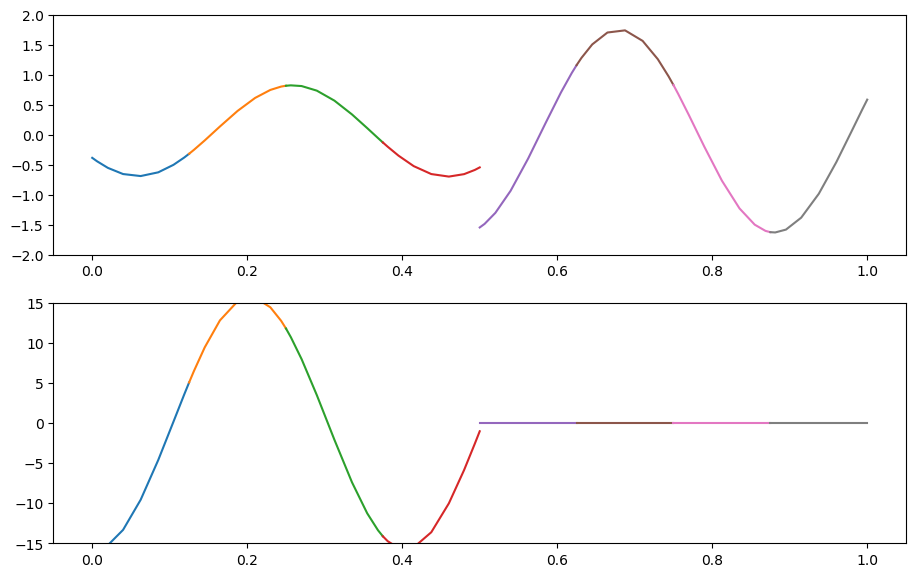

In [9]:
plt.figure(figsize=(11, 7), dpi=100)

plt.subplot(2,1,1)
#interpolated_plot(u,x,20)
for i in range(len(u)):
    plt.plot(x[i],u[i])
    plt.ylim(-2,2)
plt.subplot(2,1,2)
for i in range(len(u)):
    plt.plot(x[i],v[i])
    plt.ylim(-15,15)
    


In [10]:
gap_u = u[int(K/2)][0]-u[int(K/2-1)][-1]
#print('gap_u_numerical = ', gap_u)
gap_v = v[int(K/2-1)][-1]-v[int(K/2)][0]
print('gap_v_numerical = ', gap_v)
gap_v_analytical = source_for_v(t)
print('gap_v_analytical = ', gap_v_analytical)

gap_v_numerical =  -1.0100925466598965
gap_v_analytical =  -1.0100922085977455


In [11]:
gap_v/gap_v_analytical

1.0000003346844457

# Wave with source and potential

In [12]:
def potential_term(x, x0, stdev):
    return 1/np.sqrt(2*np.pi*stdev**2)*np.exp(-(x-x0)**2/(2*stdev**2))

In [13]:
x = np.linspace(0,1,101)
V = potential_term(x,0.3,0.05)

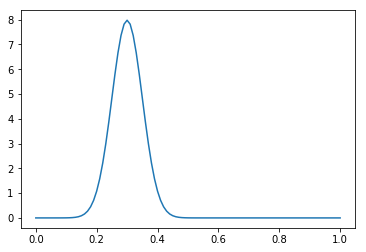

In [14]:
plt.plot(x,V)

In [15]:
addit(a)

NameError: name 'addit' is not defined

In [ ]:
addit(a,b)

In [ ]:
addit(1,2)

In [ ]:
a*b

In [ ]:
def